In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/P3856-results-cs-true-fmdw-true-2021-04-22-16-56-39/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [3]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/home/daryl/P3856-results-cs-true-fmdw-true-2021-04-22-16-56-39/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

In [4]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [23]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_fmdw_df = d['identifications_df']
identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

#### identifications without mass defect window filtering

In [24]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/P3856-results-cs-true-fmdw-false-2021-04-22-17-21-22/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [25]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITHOUT_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_fmdw_df = d['identifications_df']
identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [26]:
selected_feature_id = identifications_without_fmdw_df.sample(n=1).iloc[0].feature_id

In [27]:
selected_feature_without_fmdw = identifications_without_fmdw_df[(identifications_without_fmdw_df.feature_id == selected_feature_id)]
selected_feature_without_fmdw

,mz_apex_without_saturation_correction,mz_apex_with_saturation_correction,mz_lower,mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
48549,1332.961976,1332.963005,1332.919522,1333.00443,294.0,266,314,1851.573534,1848.396371,1855.809043,...,0.003338,0.167293,5350.73,TLSVEPSQQLDTASTEETDPETSQPEPNRPSELDLR,sp|Q8TEQ6|GEMI5_HUMAN,RL,3995.872152,3995.8719,0.063075,0.000252


In [28]:
len(json.loads(selected_feature_without_fmdw.iloc[0].fragment_ions_l))

123

In [29]:
selected_feature_with_fmdw = identifications_with_fmdw_df[(identifications_with_fmdw_df.feature_id == selected_feature_id)]
selected_feature_with_fmdw

,mz_apex_without_saturation_correction,mz_apex_with_saturation_correction,mz_lower,mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
48549,1332.961976,1332.963005,1332.919522,1333.00443,294.0,266,314,1851.573534,1848.396371,1855.809043,...,0.00295,0.157559,5369.91,TLSVEPSQQLDTASTEETDPETSQPEPNRPSELDLR,sp|Q8TEQ6|GEMI5_HUMAN,RL,3995.871932,3995.8719,0.008069,0.000032


In [30]:
len(json.loads(selected_feature_with_fmdw.iloc[0].fragment_ions_l))

75

#### unique identifications found with and without mass defect window filtering

In [31]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [32]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [33]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

4492 unique ids with fmdw, 4480 without


In [34]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [35]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
1999,IVDNGYGYVSNGSVYFDTAK,2,1.320599,0.000249,1.082804,0.000268
3603,TGPFEVGVHVLPK,2,0.904403,0.000249,0.775212,0.000268
2724,NETLGGTCLNVGCIPSK,2,1.225157,0.000249,1.016373,0.000268
4080,VSGSATGTVSDLAPGQSGMDDMK,2,0.734644,0.000249,0.609856,0.000268
2921,PGGLLLGDVAPNFEANTTVGR,2,1.241528,0.000249,1.018819,0.000268


#### compare identification score with and without

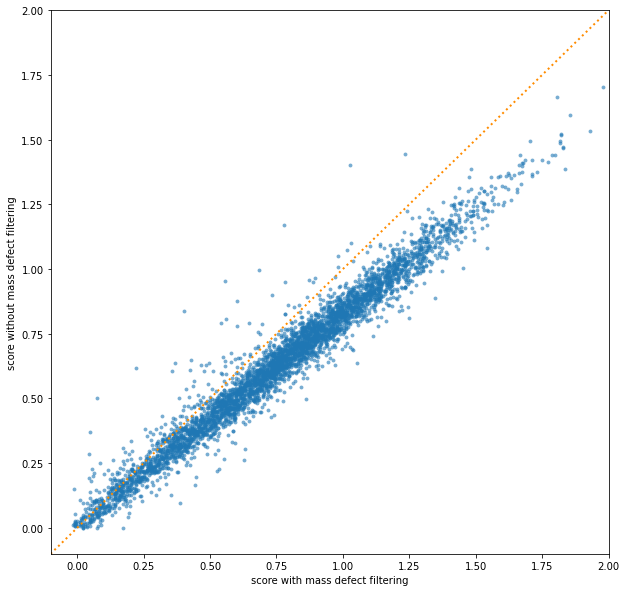

In [36]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=15, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.1,2.0))
plt.ylim((-0.1,2.0))

plt.xlabel('score with mass defect filtering')
plt.ylabel('score without mass defect filtering')

plt.show()

#### compare identification q-value with and without

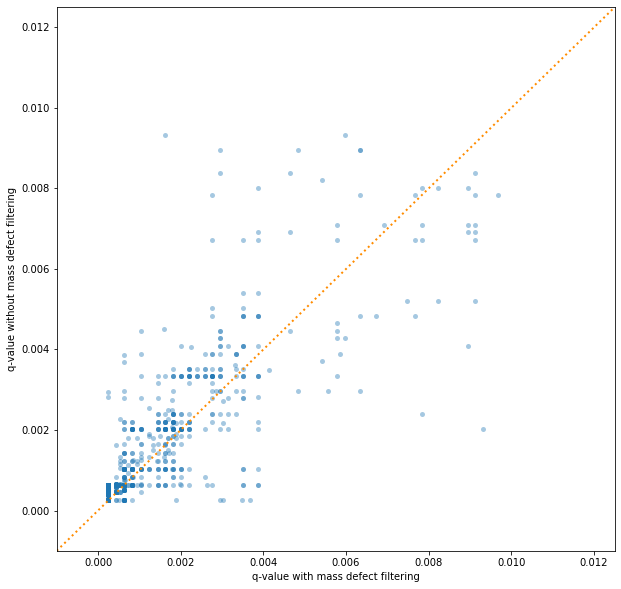

In [37]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.001,0.0125))
plt.ylim((-0.001,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()

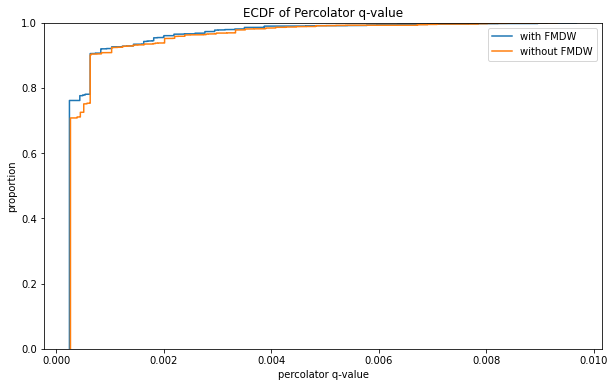

In [42]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator q-value'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="q_value_with_fmdw", label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="q_value_without_fmdw", label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator q-value', ylabel='proportion')

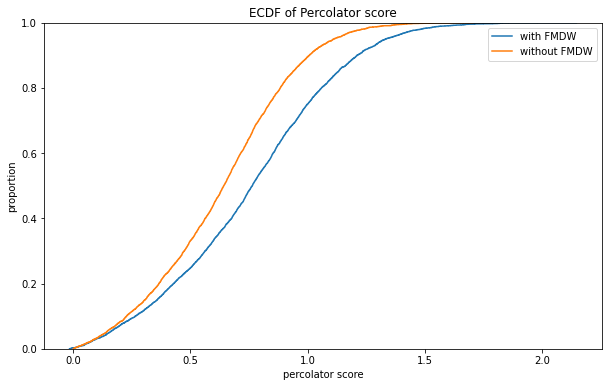

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator score'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="score_with_fmdw", legend=True, label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="score_without_fmdw", legend=True, label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator score', ylabel='proportion')